<a href="https://colab.research.google.com/github/davidkant/mai/blob/master/tutorial/1_2_Hello_Music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making Music with Python
So how do we use numbers, variables, maths, and lists to make music? We need some way of converting a list of numbers into musical sounds. That is, we need some way of interpreting a list of numbers into *musical features* — such as pitch, rhythm, or harmony. Obviously there are about a zillion ways to do this, but, as a starting point, I've included some code in the course code repository to work with. A way of interpreting numbers into music is called a *music representation*, and I'll be using this word over and over again throughout the course, because the decisions about music representation have a profound impact on the music that a musical system produces.


## Notebook Setup
First we have to install a few software packages. Don't worry about the specifics of the two code cells below. Just know that we are installing some software packages that we need in order to make sound in Python and then importing them into our current notebook session. 

* Warning: you may see a bunch of text when you execute these cells. Don't worry, it's normal.
* Important: you must run these setup cells everytime you start a new notebook session.

In [0]:
# install software repositories
from IPython.display import clear_output
!pip install -qq git+https://github.com/davidkant/mai#egg=mai
!pip install -qq pretty_midi
!pip install -qq pyfluidsynth
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1
clear_output()

In [0]:
# import packages into our notebook session
import mai
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Representing music as lists of numbers
This is definitely the least inventive thing we could do, but let's start by interpreting a list as a sequence of notes on a piano keyboard. We'll be using a convention for mapping integers to piano keys called [General MIDI](https://en.wikipedia.org/wiki/General_MIDI). In General MIDI, the key middle C on a piano keyboad is mapped to the value `60`.   


The course code package contains a function `mai.make_music()` which will get us started. Don't worry about the code syntax in the following cells — we'll learn about functions later. However, try to understand the music representation. That is, how numbers and lists are being interpreted into music.

In [0]:
# a list of numbers
my_music = [30, 50, 42, 61, 75, 2, 33]

# list interpreted into music
mai.make_music(my_music)

## Visual Representations
I also find it useful to use look at a visual representation. Here's a simple *line plot*.



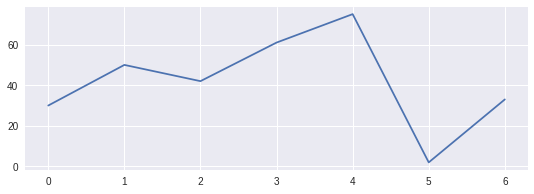

In [0]:
# line plot
plt.figure(figsize=(9,3))
plt.plot(my_music)
plt.show()

Musicians are generally more familiar with something called *piano roll*, which looks more like this. The horizontal axis represents time (in this case, in seconds) and the vertical axis represents pitch.

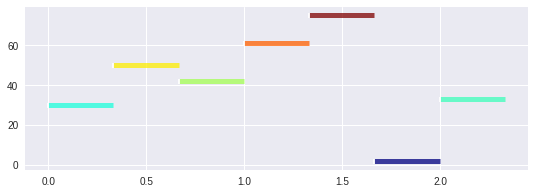

In [0]:
# music plot
mai.make_music_plot(my_music)

## Duration
Let's slow that music down by changing the note **duration** to `1` second. Do this by adding the keyword `durs` inside the parenthesis and giving it the value `1`.

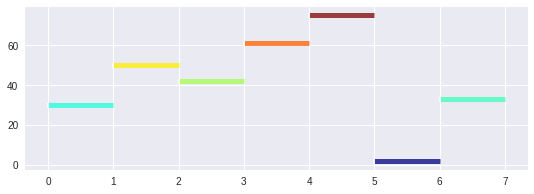

In [0]:
# pitches
my_music = [30, 50, 42, 61, 75, 2, 33]

# plot it
mai.make_music_plot(my_music, durs=1)

# play it
mai.make_music(my_music, durs=1)

Now let's give it a **list of durations** called `my_durs`. I think we just figured out to how represent *rhythm*!

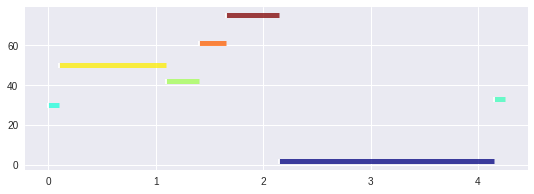

In [0]:
# pitches
my_music = [30, 50, 42, 61, 75, 2, 33]

# durations
my_durs = [0.1, 1.0, 0.3, 0.25, 0.5, 2.0, 0.1]

# plot it
mai.make_music_plot(my_music, durs=my_durs)

# play it
mai.make_music(my_music, durs=my_durs)

## Instrument
We can change the **instrument** using the the keyword `pgm`. Check out General Midi [Program change events](https://en.wikipedia.org/wiki/General_MIDI#Program_change_events) for a list of instruments and their program numbers `pgm`.

In [0]:
# pitches
my_music = [30, 50, 42, 61, 75, 2, 33]

# durations
my_durs = [0.1, 1.0, 0.3, 0.25, 0.5, 2.0, 0.1]

# play it with MIDI program 39
mai.make_music(my_music, durs=my_durs, pgm=39)

We can use **drum sounds** instead by setting keyword `is_drums` to `True`. Check out General Midi [Percussion](https://en.wikipedia.org/wiki/General_MIDI#Percussion) for a list of percussion instruments. Change the note values of `my_music` to hear the different percussion sounds.

In [0]:
# pitches
my_music = [30, 50, 42, 61, 75, 2, 33]

# durations
my_durs = [0.1, 1.0, 0.3, 0.25, 0.5, 2.0, 0.1]

# play it with drum sounds
mai.make_music(my_music, durs=my_durs, is_drum=True)

## More Info
If you want to know more (and have some Python experience) you can check out the help file or consult the [github page](https://github.com/davidkant/mai)

In [0]:
help(mai.make_music)

Help on function make_music in module mai.music_makers:

make_music(pitches=60, durs=0.333, pgm=1, is_drum=False, format='inbrowser', sr=16000)
    Turn lists of numbers into music.
    
    Converts pitch and duration values into MIDI and/or audio playback. Uses
    `pretty_midi` for MIDI representation handling, fluidsynth for resynthesis, 
    and `IPython.display.Audio` for browser playback.
        
    Parameters
    ----------
    pitches : list or scalar
        List of pitches, or scalar if constant pitch. Floating point values are
        interpreted as microtonal pitch deviations.
    durs: list or scalar
        List of durations, or scalar if constant duration. 
    pgm: number
        MIDI program number, in range ``[0, 127]``.
    is_drum : bool
        If True use percussion channel 10.
    format : string
        Which format to render sound to?
        - `'MIDI'` returns MIDI as a `pretty_midi` object
        - `'audio'` returns waveforms as a `numpy` nd.array  
     

# A preview of coming attractions: Generating music

OKTHEN, now the question is: how do we find the right numbers for the music we want to hear? We're going to see many many many different answers to this question throughout the course. Think about it and come to our next class meeting with some initial thoughts.

Here are some ideas to get you started. The advantage of using a computer is that we don't have to hand-pick all of the notes. Here we use the nifty list comprehension to *procedurally generate* note pitches and durations. Don't worry about the code in these cells, just listen.

###Ex 1: Duration inverse to pitch
In this example, the value of the note duration is inverse to its pitch value, meaning `duration = 1.0 / pitch`.

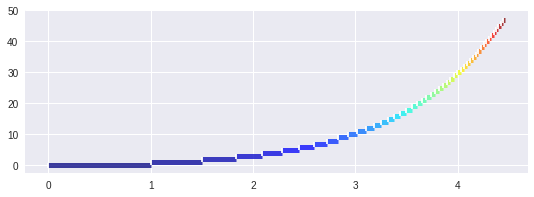

In [0]:
# pitches
my_music = [x for x in range(48)]

# durations
my_durs = [1.0/(x+1) for x in range(48)]

# plot it
mai.make_music_plot(my_music, durs=my_durs)

# play it
mai.make_music(my_music, durs=my_durs, pgm=1)

### Ex 2: 100 notes between C and C# (two adjacent keys on the piano)
If you're feeling too confined by the twelve notes of the piano keyboard, floats are interepreted as microtones.

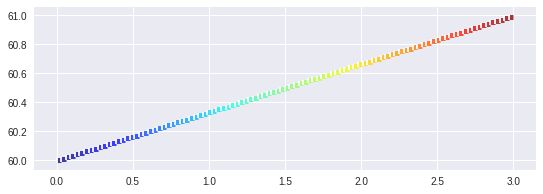

In [0]:
# pitches
my_music = [60 + x/100.0 for x in range(100)]

# durations
my_durs = 3.0/100.0

# plot it
mai.make_music_plot(my_music, durs=my_durs)

# play it
mai.make_music(my_music, durs=my_durs, pgm=1)

###Ex 3: Random microtonal pitches
Just some random pitches and durations.

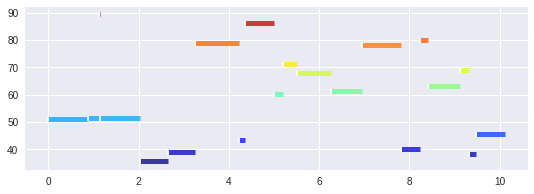

In [0]:
import random

# pitches
my_music = [random.random() * 60.0 + 30 for x in range(20)]

# durations
my_durs = [random.random() for x in range(20)]

# plot it
mai.make_music_plot(my_music, durs=my_durs)

# play it
mai.make_music(my_music, durs=my_durs, pgm=1)

### Ex 4: Using a sine function to generate pitches
In this example, the note pitches follow the curve of a sine function.

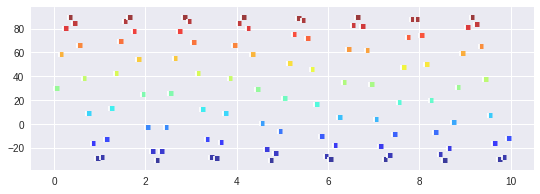

In [0]:
import math

# pitches
my_music = [math.sin(0.5*x) * 60.0 + 30 for x in range(100)]

# durations
my_durs = 0.1

# plot it
mai.make_music_plot(my_music, durs=my_durs)

# play it
mai.make_music(my_music, durs=my_durs, pgm=1)